# Data Science Regression Project: Predicting Home Prices in Banglore


In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [2]:
!pip install sklearn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
House_data = pd.read_csv('Bengaluru_House_Data.csv')
House_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
House_data = House_data.drop(['area_type','availability','location','society'],axis='columns')
House_data.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [7]:
House_data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
House_data.isnull().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
House_data=House_data.fillna(0)
House_data.isnull().sum()

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
House_data.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [11]:
House_data.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [12]:
House_data.tail()

,size,total_sqft,bath,balcony,price
13315,5 Bedroom,3453,4.0,0.0,231.0
13316,4 BHK,3600,5.0,0.0,400.0
13317,2 BHK,1141,2.0,1.0,60.0
13318,4 BHK,4689,4.0,1.0,488.0
13319,1 BHK,550,1.0,1.0,17.0


In [13]:
House_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', 0, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
House_data['size'] = House_data['size'].astype(str)
House_data['bhk'] = House_data['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
House_data['bhk']=House_data['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
House_data.head()

,size,total_sqft,bath,balcony,price,bhk
0,2 BHK,1056,2.0,1.0,39.07,2
1,4 Bedroom,2600,5.0,3.0,120.00,4
2,3 BHK,1440,2.0,3.0,62.00,3
3,3 BHK,1521,3.0,1.0,95.00,3
4,2 BHK,1200,2.0,1.0,51.00,2


In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
House_data[~House_data['total_sqft'].apply(is_float)]

,size,total_sqft,bath,balcony,price,bhk
30,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,4 Bedroom,3010 - 3410,0.0,0.0,192.000,4
81,4 Bedroom,2957 - 3450,0.0,0.0,224.500,4
122,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,2 BHK,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...
12990,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13240,1 BHK,1020 - 1130,0.0,0.0,52.570,1
13265,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)== 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
House_data =House_data.copy()
House_data['total_sqft']=House_data['total_sqft'].apply(convert_sqft_to_num)
House_data.head()

,size,total_sqft,bath,balcony,price,bhk
0,2 BHK,1056.0,2.0,1.0,39.07,2
1,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,3 BHK,1440.0,2.0,3.0,62.00,3
3,3 BHK,1521.0,3.0,1.0,95.00,3
4,2 BHK,1200.0,2.0,1.0,51.00,2


In [21]:
import seaborn as sns

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


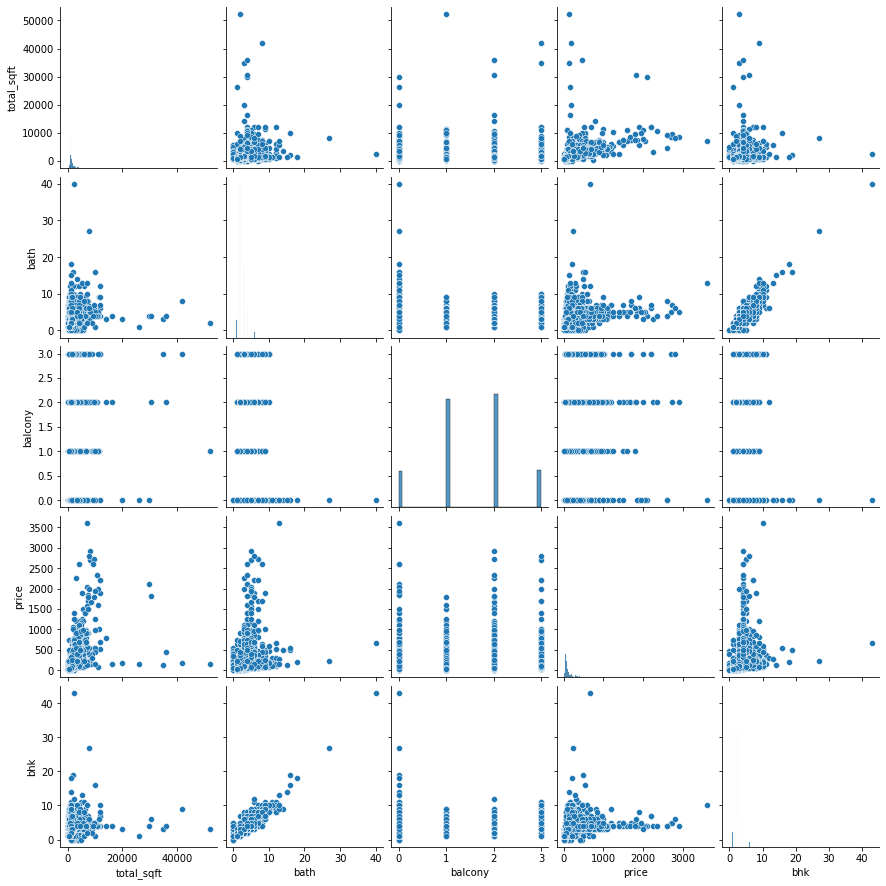

In [22]:
sns.pairplot(House_data)

In [23]:
# Here we have to create two variable i.e X and Y Where in X variable we 

In [24]:
X = House_data[[ 'bhk', 'bath', 'balcony']]

Y = House_data['price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Train the model and test the model by importing sklearn.

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.40, random_state=101)

In [28]:
X_train

,bhk,bath,balcony
2545,2,2.0,2.0
12336,3,3.0,3.0
792,2,2.0,2.0
7559,2,2.0,1.0
10306,1,1.0,1.0
...,...,...,...
5695,3,5.0,2.0
8006,4,4.0,1.0
1361,4,5.0,0.0
1547,2,2.0,1.0


In [29]:
#  Here we import Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
House_data = pd.DataFrame(lr.coef_,X.columns,columns =['Coefficient'])

In [34]:
House_data

,Coefficient
bhk,-1.51083
bath,49.48824
balcony,-3.35682


In [35]:
predictions = lr.predict(X_test)

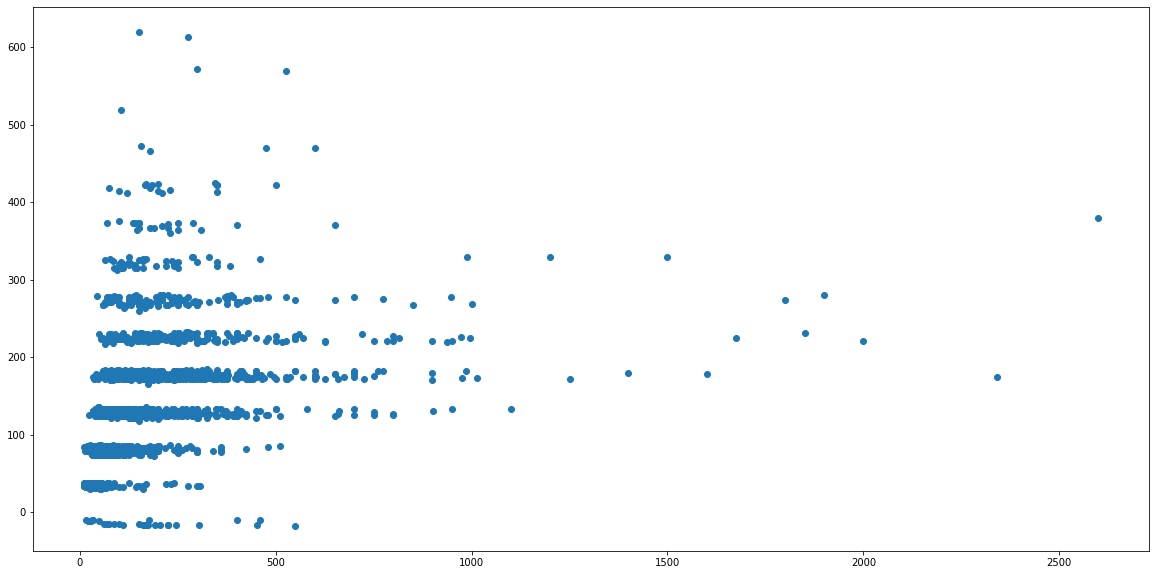

In [36]:
plt.scatter(Y_test, predictions)